# Datasets and Inputs

In [3]:
import pandas as pd

This is a classification problem where the model takes as input plain text and produces a list of words contained in that text and classifies them as corresponding to a particular entity.

Given the plain text of a recipe’s ingredient, find and label its parts: quantity, unit of measure, ingredient name.

For example, given following list of ingredients in plain text

```
INGREDIENTS 
4 large eggs
1/4 cup milk
pinch salt
pinch pepper
2 tsp. butter
```

Extract the information in this manner:

```
Ingredients = [eggs, milk, salt, pepper, butter]
Quantities = [4, 1/4, null, null, 2]
Units = [null, cup, pinch, pinch, tsp.]
```

Since I already have a list of recipes (in german), I will use those ingredients and label all parts myself in a semiautomatic way, since they are already stored in a structured manner in the database.

Below you can see an excerpt of the data which contains 573 rows in total:

In [4]:
csv_file = 'data/data.csv'
ingredients_df = pd.read_csv(csv_file)

print(f"Total number of rows: {len(ingredients_df.index)}")

# print out the first few rows of data info
ingredients_df.head(10)

Total number of rows: 573


,ingredient,quantity,unit,name
0,2.00 Becher süße Sahne,2.00,Becher,süße Sahne
1,6.00 Blätter Basilikum,6.00,Blätter,Basilikum
2,4.00 Blätter Petersilie,4.00,Blätter,Petersilie
3,0.52 Bund Minze,0.52,Bund,Minze
4,0.52 Bund Petersilie,0.52,Bund,Petersilie
5,1.00 Bund Frühlingszwiebeln,1.00,Bund,Frühlingszwiebeln
6,0.52 Bund Petersilie,0.52,Bund,Petersilie
7,1.00 Bund Frühlingszwiebeln,1.00,Bund,Frühlingszwiebeln
8,1.00 Bund Koriander,1.00,Bund,Koriander
9,0.52 Bund Petersilie,0.52,Bund,Petersilie


## Column 'ingredient'
The first column **ingredient** contains the ingredient plain text as we would find it in a recipe description. This plain text contains normally three pieces of information: the quantity, the unit of measure and the ingredient name. These parts were extracted into the following three columns:

## Column 'quantity'
The second column **quantity** contains the numeric amount and is somewhat skewed as shown below so it may need some adjustment in the training phase.

In [5]:
ingredients_df.quantity.describe()

count     573.000000
mean      165.725375
std       383.715068
min         0.120000
25%         1.520000
50%         4.000000
75%       200.000000
max      6000.000000
Name: quantity, dtype: float64

### Histogram

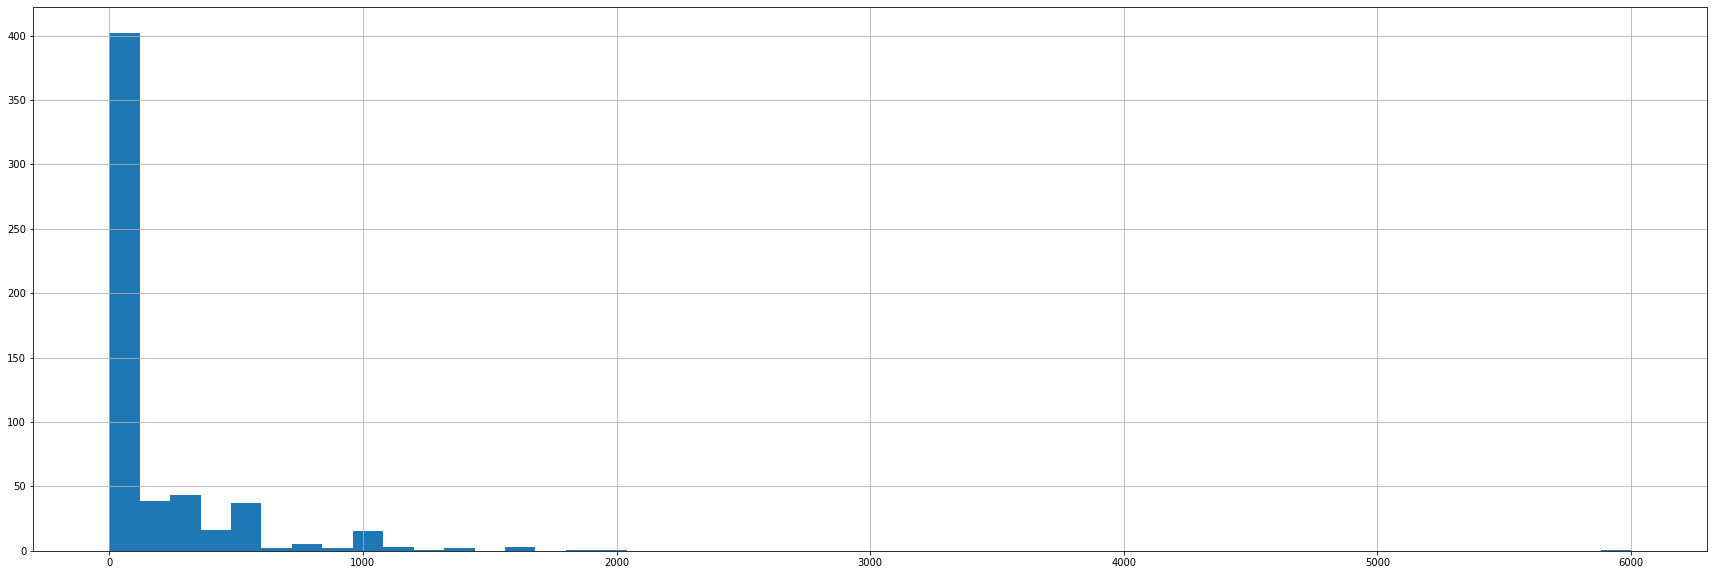

In [6]:
ingredients_df.quantity.hist(figsize = (30,10), bins=50)

### Boxplot

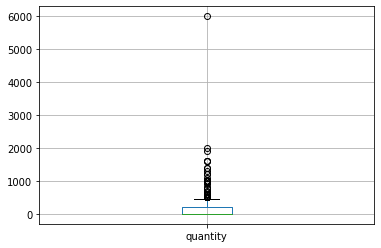

In [13]:
ingredients_df.boxplot(column='quantity')

### Outliers
We can see there is an outlier. Let's dive into the data to investigate that further.

In [8]:
ingredients_df[ingredients_df.quantity>2000]

,ingredient,quantity,unit,name
354,"6000.00 ml Berchtesgadener frische Milch 1,5%",6000.0,ml,"Berchtesgadener frische Milch 1,5%"


Let's plot the boxplot without the outlier.

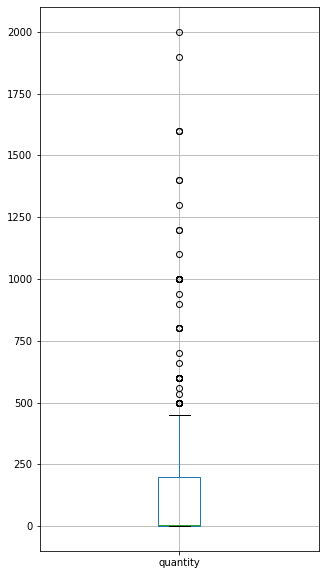

In [9]:
ingredients_df_without_outliers = ingredients_df[ingredients_df.quantity<5000]
ingredients_df_without_outliers.boxplot(column='quantity', figsize = (5,10))

Let's plot the boxplot grouped by unit of measure

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


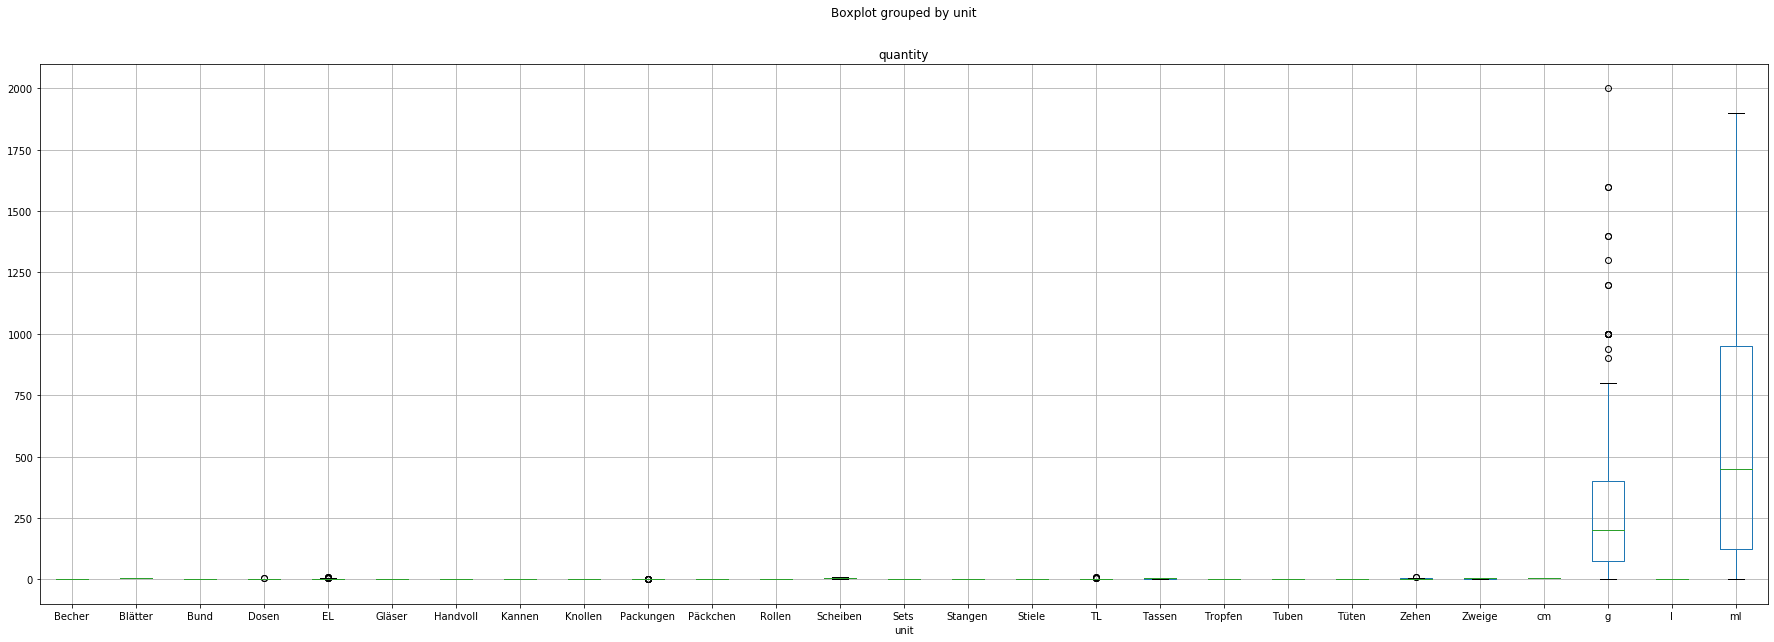

In [10]:
ingredients_df_without_outliers.boxplot(column='quantity', by='unit', figsize = (30,10))

We can see that most units of measure (like tablespoon=EL or teaspoon=TL) have a range of values close to 0 (like 0.5, 1, 2, 3), whilst the units gram and milliliter have a range between 0 and 2000.

# Column 'unit'
The third column **unit** contains the different types of units of measurement for the ingredients and contains 27 unique values as shown below.

In [12]:
ingredients_df.unit.describe()

count     573
unique     27
top         g
freq      211
Name: unit, dtype: object

### Histogram

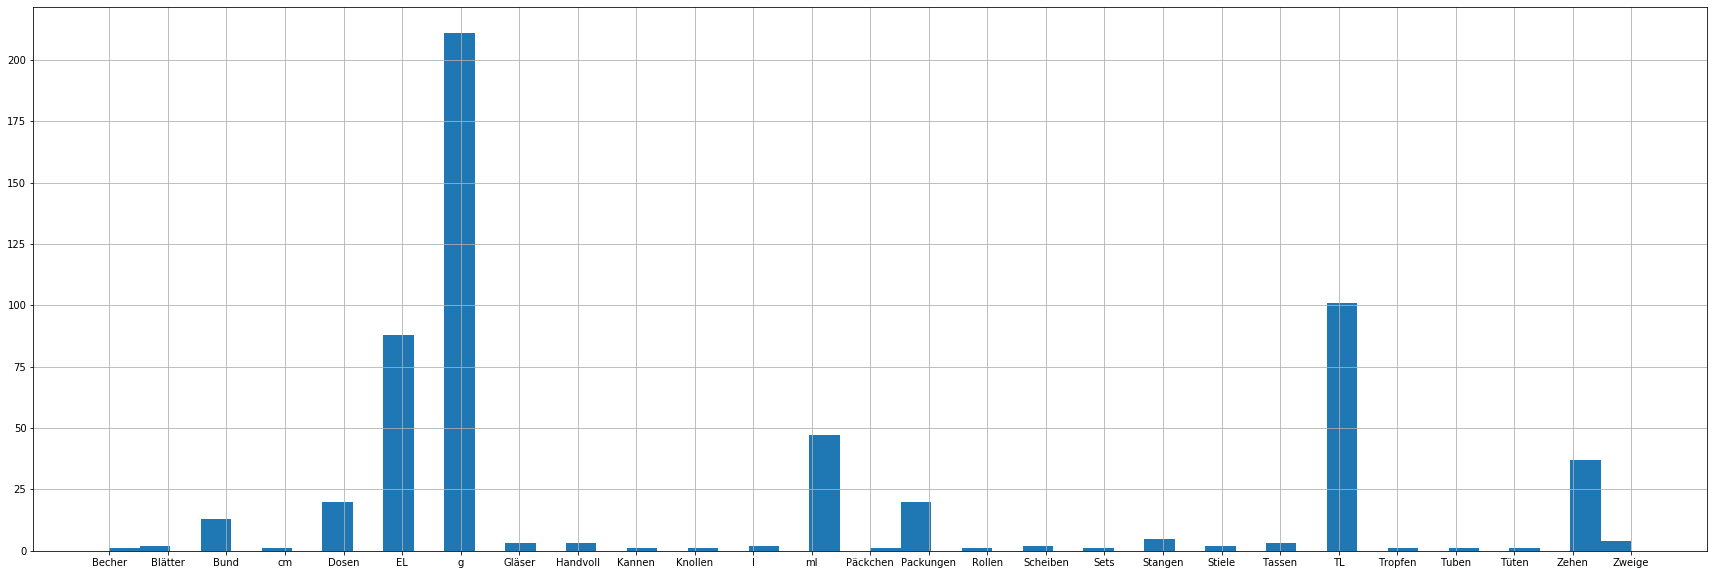

In [15]:
ingredients_df.unit.hist(figsize = (30,10), bins=50)